In [747]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sales = pd.read_csv('sales.csv')

### 1) Total Sales By Region

Text(0, 0.5, 'Total Sales (USD)')

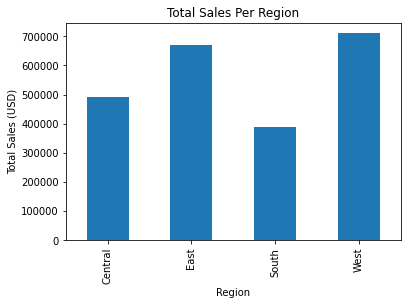

In [748]:
salesPerRegion  = sales.groupby('Region')['Sales'].sum()

#plotting
salesPerRegion.plot(kind='bar', title='Total Sales Per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')

### 2) Total Sales Per Category

Text(0, 0.5, 'Total Sales (USD)')

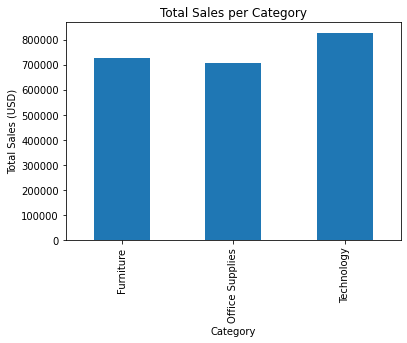

In [749]:

SalesPerCatergory = sales.groupby('Category')['Sales'].sum()

#plotting
SalesPerCatergory.plot(kind='bar',title='Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')

### 3) Top 10 Most Profitable Customers

(760.0, 800.0)

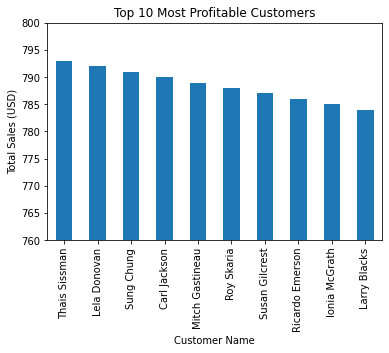

In [750]:

grouped = sales.groupby('Customer Name')['Sales'].sum()
#first groups customers by sales
CustomerRankedTotalProfit = grouped.rank(method='dense', ascending=False).astype(int).sort_values(ascending=False).head(10)


#plotting
CustomerRankedTotalProfit.plot(kind='bar', title='Top 10 Most Profitable Customers')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales (USD)')
plt.ylim(760,800)




### 4) Top 10 Most Selling Products


Text(0, 0.5, 'Total Sales (USD)')

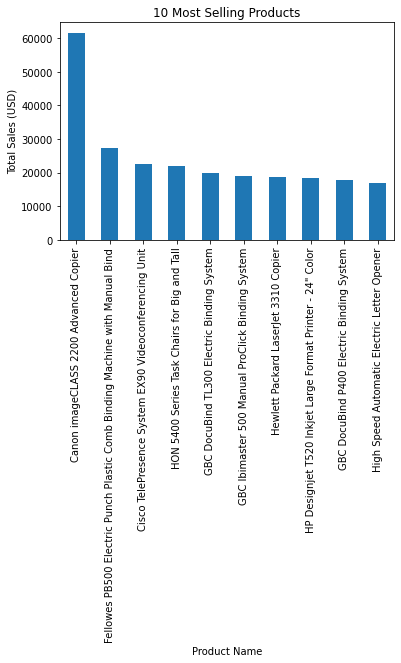

In [751]:
TopSellingProducts = sales.groupby('ProductName')['Sales'].sum().sort_values(ascending=False).head(10)

#plotting
TopSellingProducts.plot(kind='bar', title='10 Most Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales (USD)')


### 5) Find Monthly Sales Trends

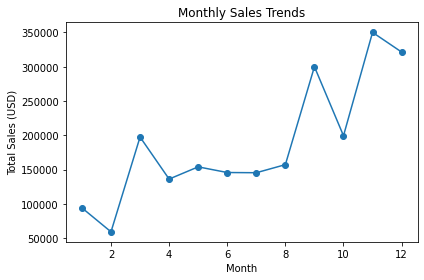

In [752]:
sales['OrderDateTime'] = pd.to_datetime(sales['OrderDate'], infer_datetime_format=True, dayfirst=True)
# this converts the OrderDate column to a datetime format so it is easier to work with
sales['OrderMonth'] = sales['OrderDateTime'].dt.month

MonthlySales = sales.groupby('OrderMonth')['Sales'].sum()

MonthlySales.plot(kind='line', marker='o', title='Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.tight_layout()

We can see here that the February had the lowest sales, with just over 50,000 USD, and this increased in March, and dipped again in April. The sales then stayed generally consistent at about 150,000 USD for 5 months. In September, however, there is a rapid increase in sales and this continues to increase until November, which marked the most sales for the company at around 350,000 USD with only a slight dip in December.

### 6) Sales Across Different Regions And States

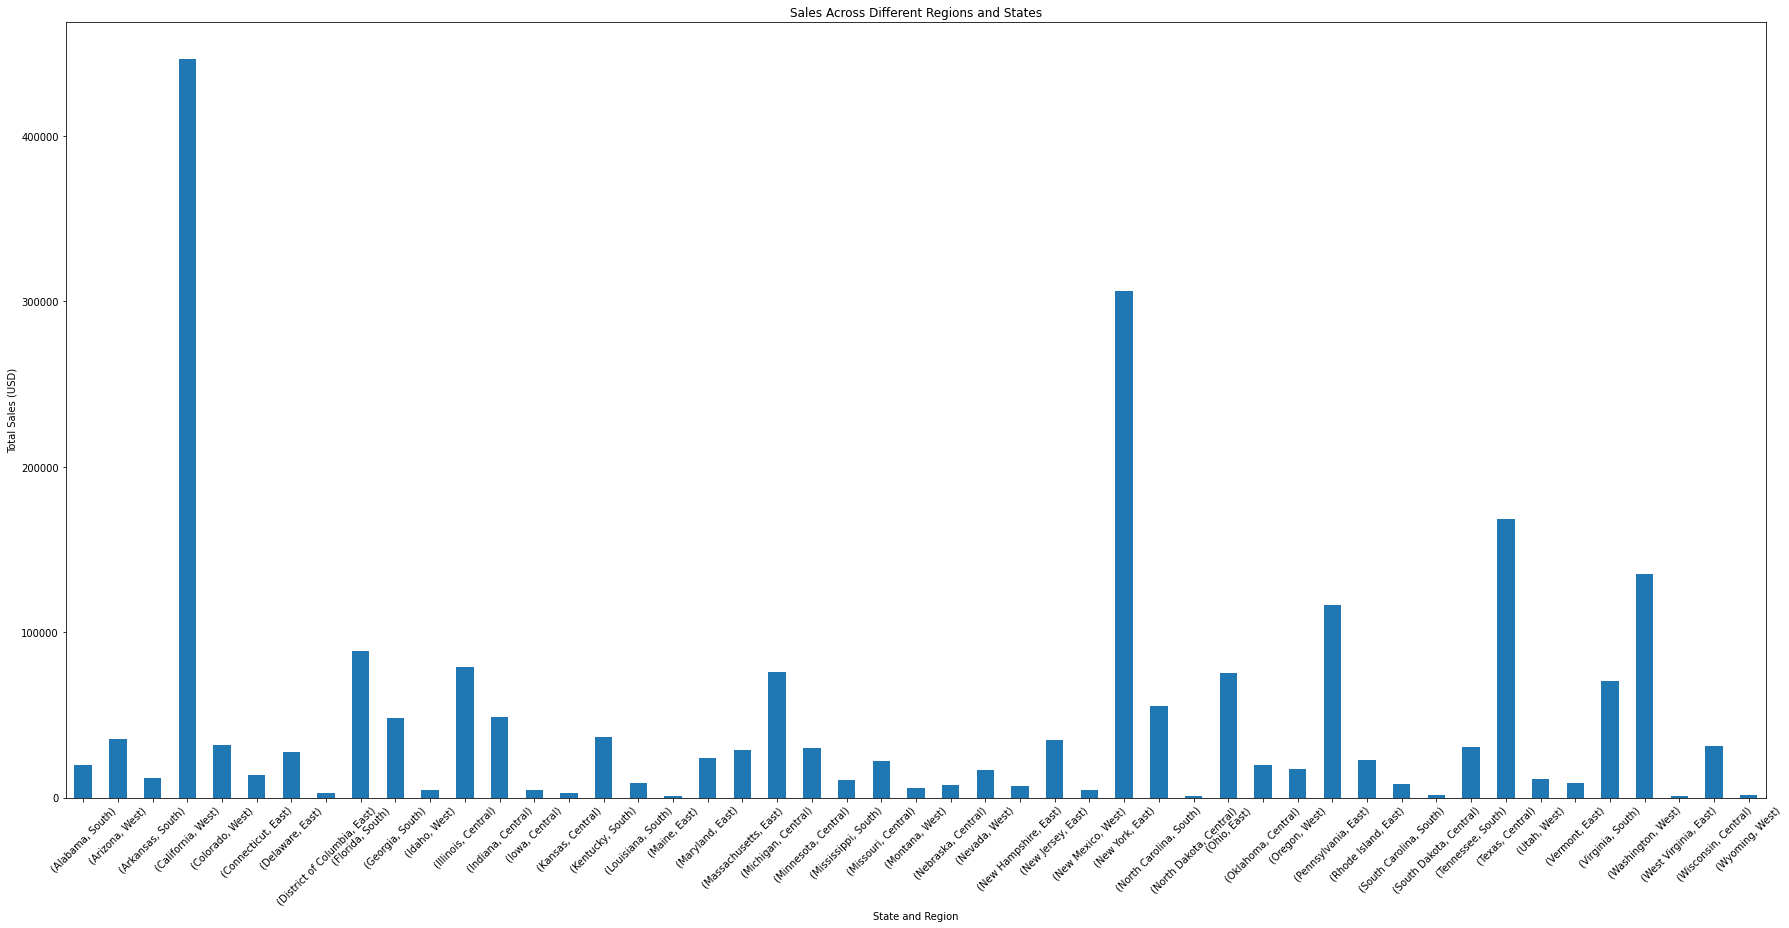

In [753]:
SalesRegionStates = sales.groupby(['State', 'Region'])['Sales'].sum()

#plotting
SalesRegionStates.plot(kind='bar', title='Sales Across Different Regions and States', figsize=(25,13))
plt.xlabel('State and Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()


This bar graph indicates that South Arkansas are where the most sales are from, generating over 40,000 USD alone. The next state and region is west New Mexico, generating about 30,000 USD, while all other states' sale are 20,000 USD or less, with south Louisana,  west Washington, south North Carolina, west Wyoming and south South Carolina generating the lowest sales. 

### 7) Category and Sub-Category Analysis

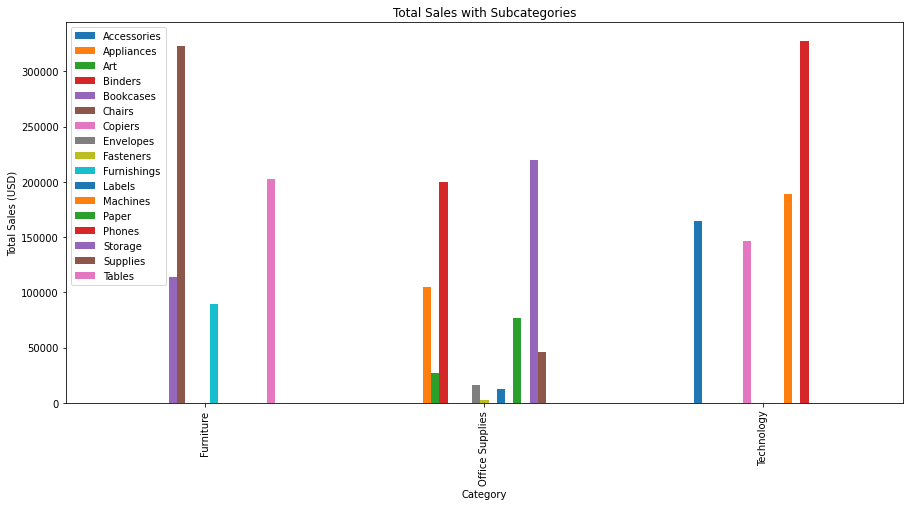

In [754]:
TotalCatSales = sales.groupby(['Category', 'Sub-Category'])['Sales'].sum().unstack()


#plotting
TotalCatSales.plot(kind='bar', title='Total Sales with Subcategories', figsize=(15,7))
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.legend()



Here we can see that the sub-category Supplies in Furniture has the most sales for the category, while Furnishings has the lowest. For the category Office Supplies, the most and least profitable sub-categories are bookcases and fastners, respectively. Binders generates the highest sales for the Technology category, while tables generates the least. 

### 8) Shipping Delay Comparison

 The delay in between when a customer places an order, and when it is shipped will be compared between different modes and regions

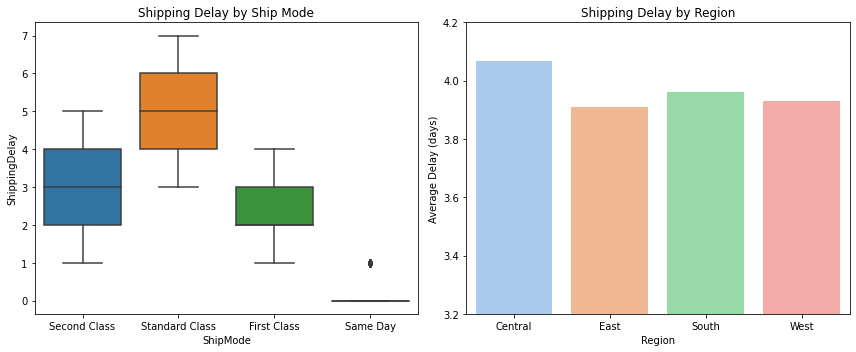

In [755]:
sales['ShipDateTime'] = pd.to_datetime(sales['ShipDate'],infer_datetime_format=True, dayfirst=True)
sales['ShippingDelay'] = (sales['ShipDateTime'] - sales['OrderDateTime']).dt.days.astype(int)

ShipDelayMode = sales.groupby('ShipMode')['ShippingDelay'].mean().reset_index()
ShipDelayRegion = sales.groupby('Region')['ShippingDelay'].mean().reset_index()

#Plotting

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='ShipMode', y='ShippingDelay', data=sales)
plt.title('Shipping Delay by Ship Mode')

plt.subplot(1, 2, 2)
sns.barplot(x='Region', y='ShippingDelay', data=ShipDelayRegion, palette='pastel')
plt.title('Shipping Delay by Region')
plt.xlabel('Region')
plt.ylabel('Average Delay (days)')
plt.ylim(3.2,4.2)
plt.tight_layout()


For the Shipping Delay by Ship Mode, the means are pretty different . For Second Class it's 3 days, First class it's slightly less than 3 days, Same day has 1 day, and Standard Class has the higest mean, being 5 days. They are generally symmetrically distributed, except for Same Day, which is skewed to the left. 
For the Shipping Delay by Region, they are generally similiar, with the largest delay in the Central region being slightly higher than 4 days, and the smallest delay in is the East region, with a value of aorund 3.9 days.

### 9) Customer Segmentation

Customers will be segmented according the the purchase frequency and sales generated

Text(0.5, 1.0, 'Customer Segmentation Based on Orders and Sales')

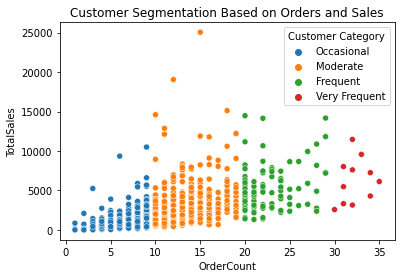

In [756]:
CustFreqOrder = sales.groupby('Customer Name')['OrderID'].count()
# gives the number of purchases the customer has done

CustSalesTotal = sales.groupby('Customer Name')['Sales'].sum()

DfCustFreqOrder = pd.DataFrame(CustFreqOrder)
DfCustSalesTotal = pd.DataFrame(CustSalesTotal)


CustFreqAndSalesTotal= pd.DataFrame({
'OrderCount': CustFreqOrder,
'TotalSales': CustSalesTotal
}) 


CustFreqAndSalesTotal['Customer Category'] = CustFreqAndSalesTotal['OrderCount'].apply(lambda x: 'Occasional' if x < 10 else('Moderate' if x < 20 else ('Frequent' if x < 30 else 'Very Frequent')))

# this segments the customers based off how many orders they've placed and the sales generated from it

#plotting
sns.scatterplot(data=CustFreqAndSalesTotal, x='OrderCount', y='TotalSales', hue='Customer Category')
plt.title('Customer Segmentation Based on Orders and Sales')




This scatterplot demonstrates that a large portion of the customers are in the moderate section, as the plot is denser in that area. There are quite a few frequent customers, and little Very Frequent customers. Although, surprisingly, the customers that are very frequent don't individually generate as many sales, as the highest point is just over 10,000 USD. However, there are some customers that are in the moderate segment, generating over 15,000 USD in sales, implying that the more frquent a customer shops, doesn't necessarily indicate that they will generate more sales.

### 10) RFM (Recency, Frequency, Monetary) Analysis

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,Customer Name,Segment,Country,City,...,Region,ProductID,Category,Sub-Category,ProductName,Sales,OrderDateTime,OrderMonth,ShipDateTime,ShippingDelay
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11-08,11,2017-11-11,3
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11-08,11,2017-11-11,3
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06-12,6,2017-06-16,4
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10-11,10,2016-10-18,7
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10-11,10,2016-10-18,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017-05-21,5,2017-05-28,7
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016-01-12,1,2016-01-17,5
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016-01-12,1,2016-01-17,5
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016-01-12,1,2016-01-17,5


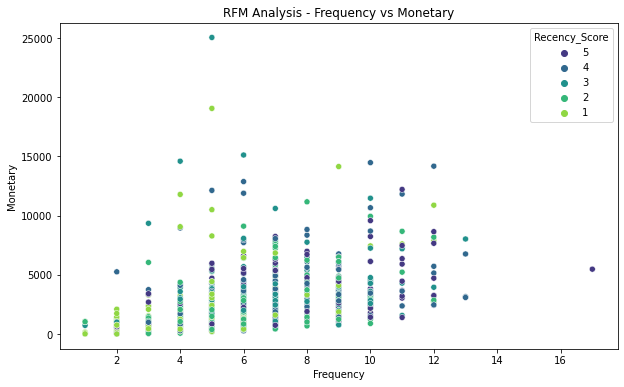

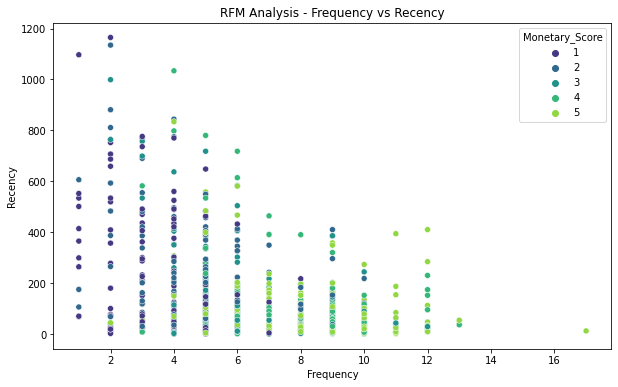

In [760]:
#Recency -> calculating days since last order

referenceDate = sales['OrderDateTime'].max()
#a reference date - most recent order

recency = sales.groupby('Customer Name')['OrderDateTime'].max().reset_index()
recency['Recency'] = (referenceDate - recency['OrderDateTime']).dt.days.astype(int)
#gets the difference in number of days

# Frequency -> number of orders
frequency = sales.groupby('Customer Name')['OrderID'].nunique().reset_index()
# counts the distinct orderID's for each customer
frequency.columns = ['Customer Name', 'Frequency']


#Monetary -> amount of money generated 
monetary = sales.groupby('Customer Name')['Sales'].sum().reset_index()
monetary.columns = ['Customer Name', 'Monetary']


#Merging the 3 databases into 1
rfm = pd.merge(recency[['Customer Name', 'Recency']], frequency, on='Customer Name')
rfm = pd.merge(rfm, monetary, on='Customer Name')

#Segment into groups
rfm['Recency_Score'] = pd.qcut(rfm['Recency'], 5, labels=range(5,0,-1)) 
# Since a lower recency is better, the range goes from 5 to 1, with 5 being the most recent
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'], 5, labels=range(1,6)) 
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'], 5, labels=range(1,6)) 

#final score
rfm['Score'] = rfm['Recency_Score'].astype(int) + rfm['Frequency_Score'].astype(int) + rfm['Monetary_Score'].astype(int)

#plotting Frequency vs Monetary
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Recency_Score', palette='viridis')
plt.title('RFM Analysis - Frequency vs Monetary')
    
#plotting Frequency vs Recency
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Frequency', y='Recency', hue='Monetary_Score', palette='viridis')
plt.title('RFM Analysis - Frequency vs Recency')


The data suggests that customers with low frequency (F = 1) tend to have a Monetary score of 1, regardless of their Recency score.Conversely, higher frequency customers display a wider range of Recency scores, indicating that repeated buyers are more evenly distributed across different recency levels.

### 11) Time Series Forecasting for Monthly Sales

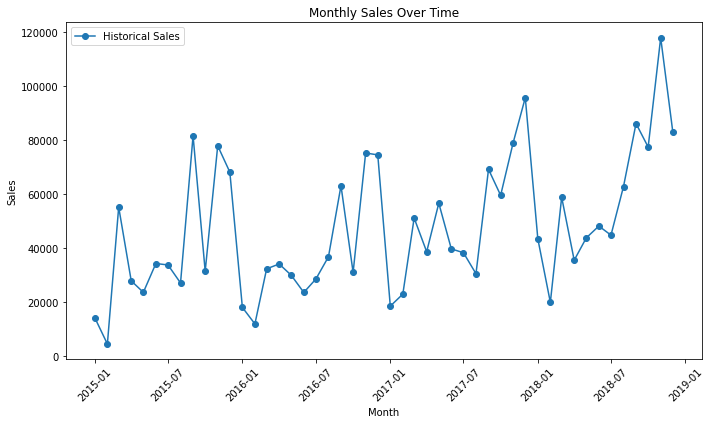

Next Month's Forecasted Sales (3-month MA): 92805.55833333333


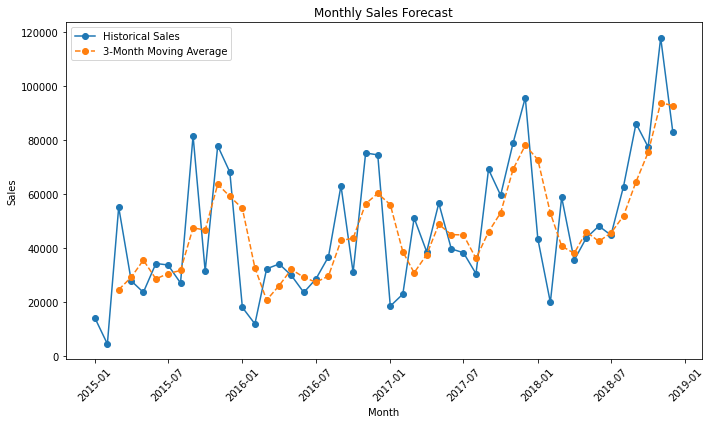

In [763]:
sales['OrderYearMonth'] = sales['OrderDateTime'].dt.to_period('M')
# this gives the value in year and month -> '2012-06'
SalesPerMonth = sales.groupby('OrderYearMonth')['Sales'].sum().reset_index()

SalesPerMonth['OrderYearMonth'] = SalesPerMonth['OrderYearMonth'].astype(str)
SalesPerMonth.index = pd.to_datetime(SalesPerMonth['OrderYearMonth'], format='%Y-%m')



#plotting
# Step 2: Plot the time series
plt.figure(figsize=(10,6))
plt.plot(SalesPerMonth.index, SalesPerMonth['Sales'], marker='o', label='Historical Sales')
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Step 3: Simple Forecast (e.g., using a 3-month moving average)
SalesPerMonth['MA3'] = SalesPerMonth['Sales'].rolling(window=3).mean()

# Forecast the next month as the last MA3 value (this is simplistic)
forecast = SalesPerMonth['MA3'].iloc[-1]
print("Next Month's Forecasted Sales (3-month MA):", forecast)

# Step 4: Visualize forecast vs. historical data
plt.figure(figsize=(10,6))
plt.plot(SalesPerMonth.index, SalesPerMonth['Sales'], marker='o', label='Historical Sales')
plt.plot(SalesPerMonth.index, SalesPerMonth['MA3'], marker='o', label='3-Month Moving Average', linestyle='--')
plt.title("Monthly Sales Forecast")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

The first graph shows the historical sales data, which exhibits fluctuations over time with a general increasing trend. The second graph adds a 3-month moving average, which smooths short-term variations and highlights the overall trend. The moving average line (orange) closely follows the sales data while reducing noise, making it easier to observe long-term patterns. The increasing trend in both graphs suggests a positive growth in sales over time, despite short-term fluctuations. This trend indicates potential seasonality or external factors influencing sales, which should be considered for forecasting future demand.

### 12) Product Affinity Analysis (Market Basket Analysis)

Text(0.5, 1.0, 'Product Co-occurrence among Top 10 Popular Products')

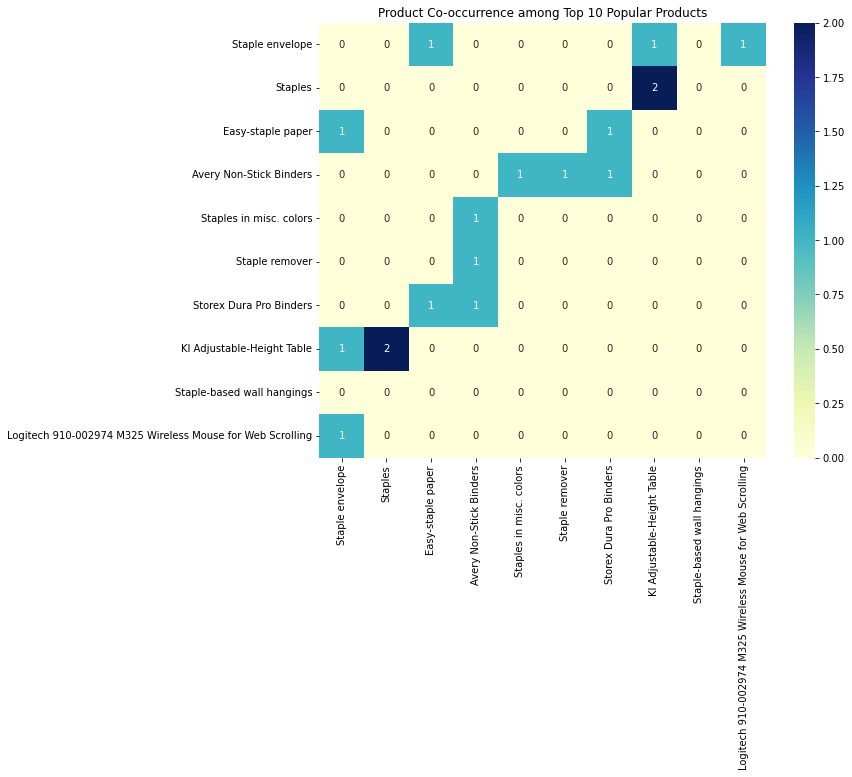

In [764]:
# for each order ID determine if there are multiple products
ProductCounts = sales.groupby('OrderID')['ProductID'].nunique()
MultipleProducts = ProductCounts[ProductCounts > 1].index
#gets the number of customers that have placed > 1 order

MultiSales = sales[sales['OrderID'].isin(MultipleProducts)]

from itertools import combinations
from collections import Counter


#List of all product combinations per order
Co_occurences = []
for orderId, group in MultiSales.groupby('OrderID'):
    products = group['ProductName'].unique()
    for combos in combinations(products,2):
        Co_occurences.append(tuple(sorted(combos)))


#getting frequency of each product pair
co_occurence_counts = Counter(Co_occurences)
Co_occurence_df = pd.DataFrame(co_occurence_counts.items(), columns=['Product Pair', 'Count'])


#visualise using heatmap
popular_products = sales['ProductName'].value_counts().head(10).index
matrix = pd.DataFrame(0, index=popular_products, columns=popular_products)
for (prod1, prod2), count in co_occurence_counts.items():
    if prod1 in popular_products and prod2 in popular_products:
        matrix.loc[prod1, prod2] = count
        matrix.loc[prod2, prod1] = count

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Product Co-occurrence among Top 10 Popular Products")


This heatmap demosntrates that there is a high occurence between some products such as Staples and KI Adjustable Height Table. Other products with a higher occurence, indicating they're often bought together is Staple Envelope, and Easy-Staple Paper, Avery Non-Stick Binders and Storex Dura Pro Binders. 

### 13) Analyzing customer retention

This will be  achieved through grouping customers into chorts based on the month of their first order, and tracking their subsequent purchase beahviours

Text(204.0, 0.5, 'Cohort(Month of First Purchase)')

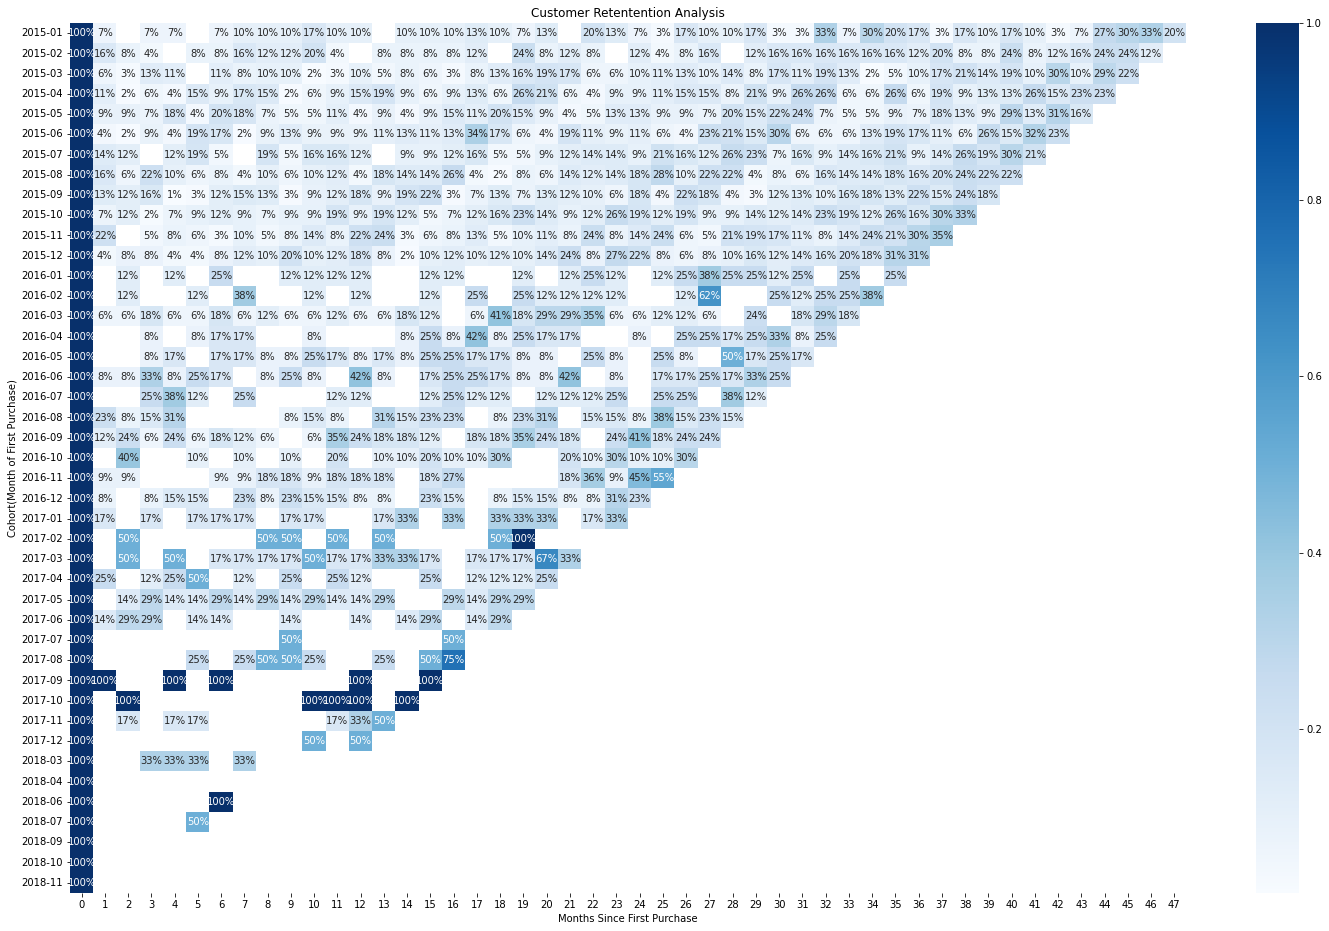

In [765]:
#1) Identify customers cohort month (the first month they ordered a product)
firstOrder = sales.groupby('Customer Name')['OrderDateTime'].min().reset_index()
firstOrder.columns = ['Customer Name', 'FirstOrderDate']
#this changes the customer name col in the database firstOrder to be firstorderDate to make it easier to recognise and use

sales = pd.merge(sales, firstOrder[['Customer Name', 'FirstOrderDate']],  on='Customer Name')
sales['CohortMonth'] = sales['FirstOrderDate'].dt.to_period('M')

#2) Calculating cohort Index
sales['CohortIndex'] = (sales['OrderDateTime'].dt.to_period('M') - sales['CohortMonth']).apply(lambda x: x.n)
#lambda function gets the number of months as in integar
# cohort index = 0 means order was placed in customers 1st month, cohort index = 1 means order was placed 1 month later etc.


#3) CohortTable
cohorts = sales.groupby(['CohortMonth', 'CohortIndex'])['Customer Name'].nunique().reset_index()
#grouping by both cohort month and cohort index
pivotCohort = cohorts.pivot(index='CohortMonth', columns='CohortIndex', values='Customer Name')
#creates a matrix 


#4) Retention Rate
cohortSize = pivotCohort.iloc[:,0]
#this is the number of customers in first month (cohortindex=0) for each cohort
retention = pivotCohort.divide(cohortSize, axis=0)
#divides each cell by the cohort size, converting counts into percentages or fractions

#5) Plotting
plt.figure(figsize=(25,16))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title('Customer Retentention Analysis')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort(Month of First Purchase)')



This heatmap shows that the most retained customers were in 2017, and would order about 8 - 16 months after their cohort month. However, the customer that had a retention of over 50% would order about 5 - 6 months after their cohort month. As the months increase since their first purchase, the retention rate would generally decrease too.